In [162]:
using DataFrames, FileIO, DelimitedFiles
using Plots, Optim, LsqFit, JUMD
using Statistics, NamedArrays

In [163]:
# Get ready
dir_apo_hbo = "/home/pbarletta/labo/20/cph_obp/run/apo/hbond"

aa = 119
nstlim = 19500
phs = collect(30:5:75)
idx = collect(1:10)
pdt_steps = collect(0:1:7)
titratable_cnt = 36
titratable_resis = [4, 5, 7, 11, 13, 18, 20, 24, 27, 30, 33, 37, 39,
    40, 41, 42, 48, 52, 58, 59, 64, 69, 73, 77, 78, 82, 87, 93, 94,
    97, 99, 102, 109, 111, 114, 117];
titratable_resnames = ["GL4", "GL4", "LYS", "HIP", "GL4", "LYS", "GL4", "AS4", "LYS",
    "AS4", "GL4", "AS4", "GL4", "AS4", "LYS", "LYS", "GL4", "LYS",
    "AS4", "LYS", "LYS", "LYS", "GL4", "AS4", "GL4", "LYS", "AS4",
    "GL4", "GL4", "HIP", "LYS", "LYS", "LYS", "LYS", "LYS", "AS4"]

idx_of_titratable = fill(0, aa)
[ idx_of_titratable[titratable_resis[i]] = i for i in 1:titratable_cnt ];

titratable_residues = [ string(titratable_resnames[i], "_", titratable_resis[i]) 
    for i in 1:titratable_cnt ];

In [164]:
for i in 1:10
    global nhb_apo_idx = convert(Array{Float64, 1}, readdlm(joinpath(dir_apo_hbo, string(idx[i]),
            string("nhb_apo_", idx[i])))[2:end, 2])
    global nhb_apo_phs = convert(Array{Float64, 1}, readdlm(joinpath(dir_apo_hbo, string(phs[i], "ph"),
            string("nhb_apo_", phs[i])))[2:end, 2])

    sym_nhb_apo_idx = Symbol("nhb_apo_", idx[i])
    sym_nhb_apo_phs = Symbol("nhb_apo_", phs[i])
    eval(:($sym_nhb_apo_idx = nhb_apo_idx))
    eval(:($sym_nhb_apo_phs = nhb_apo_phs))
end

## hbonds count por pH

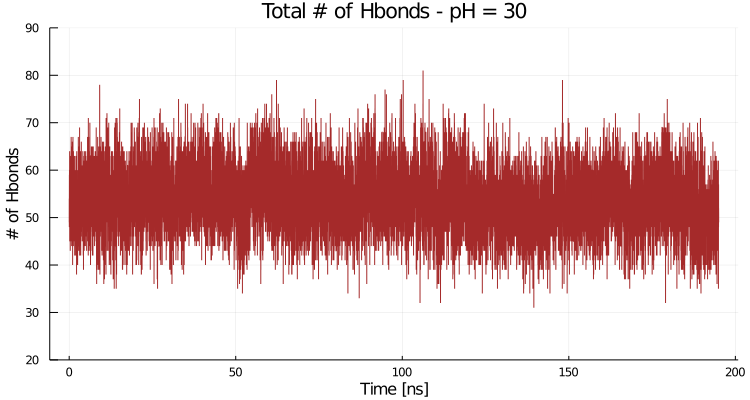

In [165]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_apo_30,
        title = string("Total # of Hbonds - pH = ",30), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

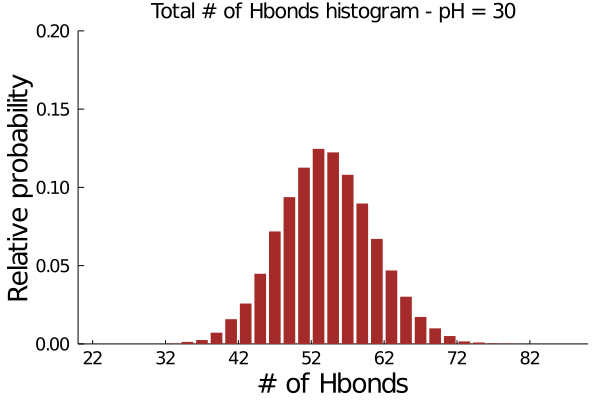

In [166]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_30))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_30, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",30),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

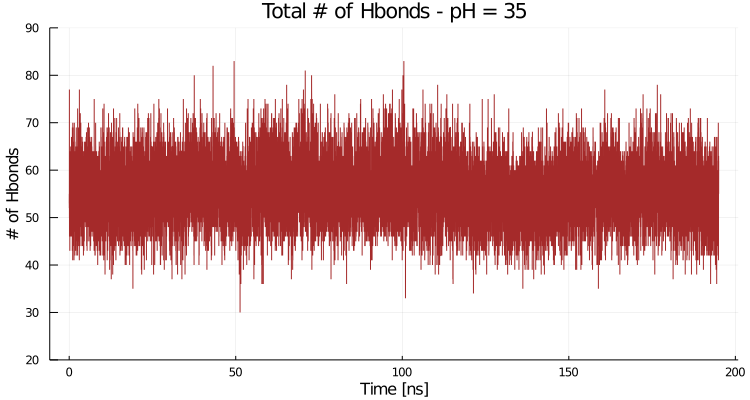

In [167]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_apo_35,
        title = string("Total # of Hbonds - pH = ",35), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

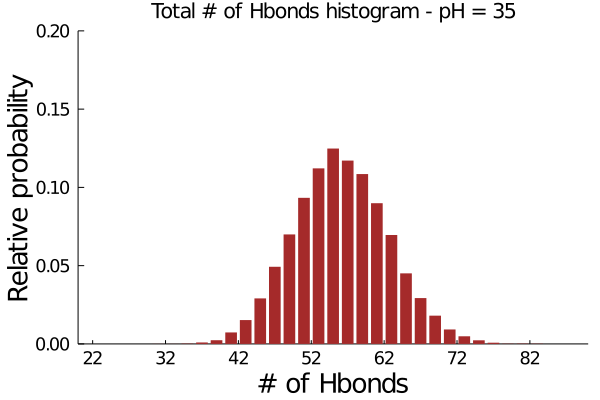

In [168]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_35))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_35, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",35),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

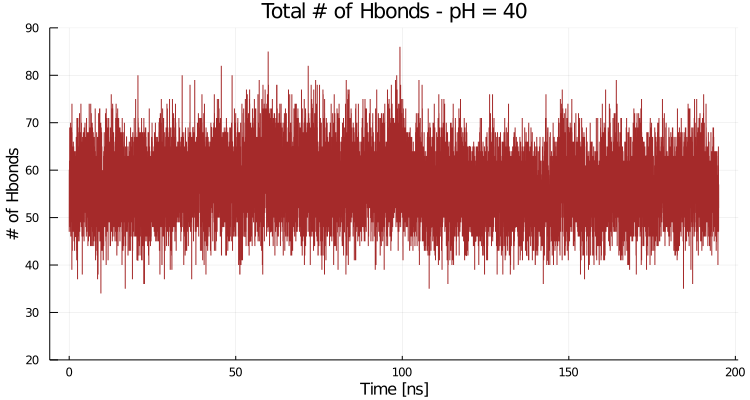

In [169]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_apo_40,
        title = string("Total # of Hbonds - pH = ",40), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

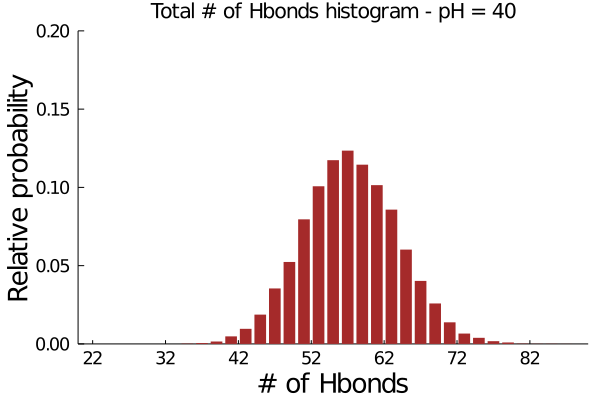

In [170]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_40))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_40, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",40),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

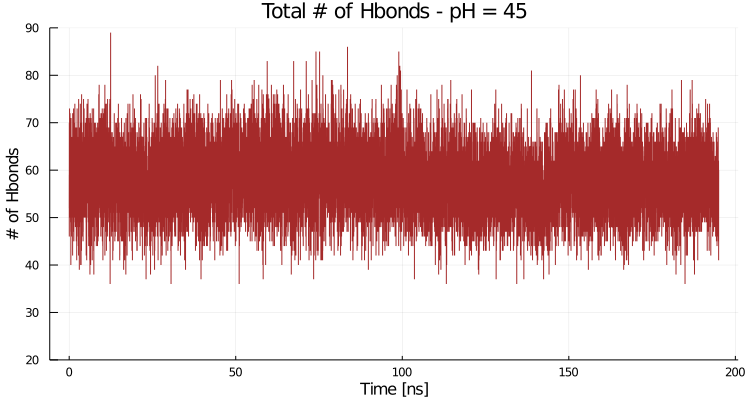

In [171]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_apo_45,
        title = string("Total # of Hbonds - pH = ",45), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

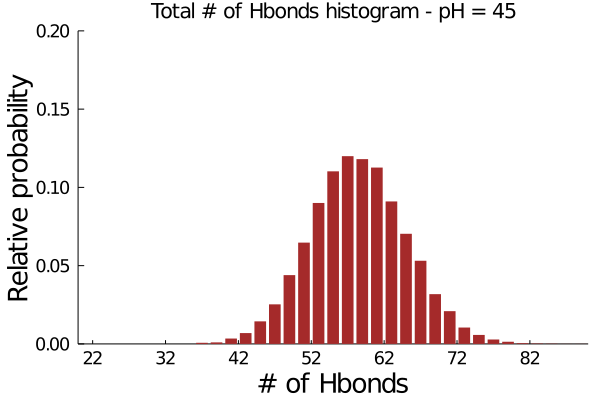

In [172]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_45))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_45, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",45),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

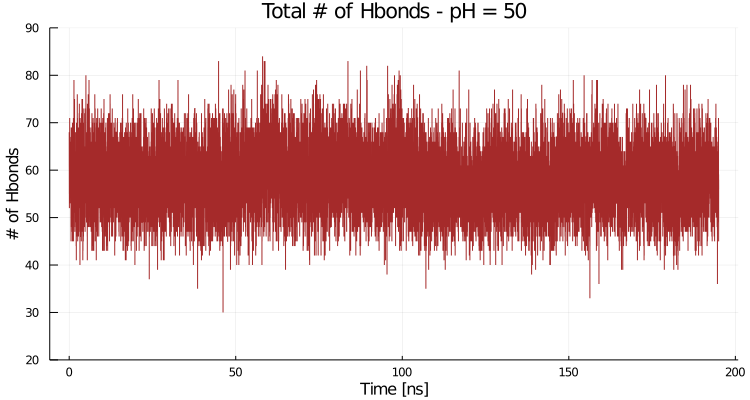

In [173]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_apo_50,
        title = string("Total # of Hbonds - pH = ",50), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

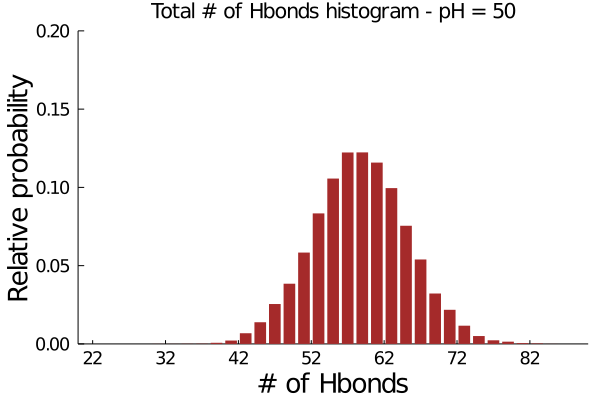

In [174]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_50))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_50, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",50),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

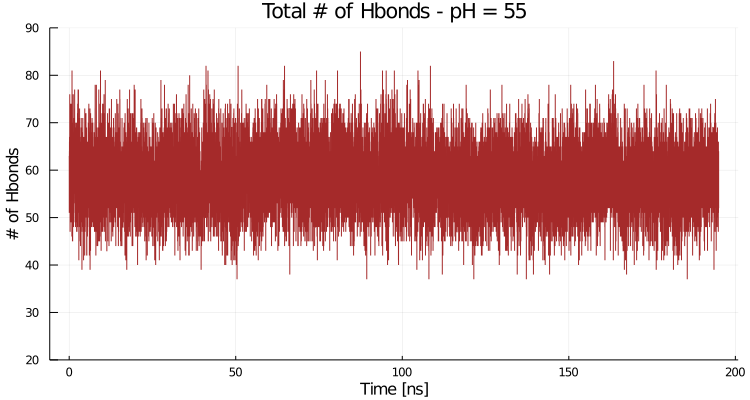

In [175]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_apo_55,
        title = string("Total # of Hbonds - pH = ",55), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

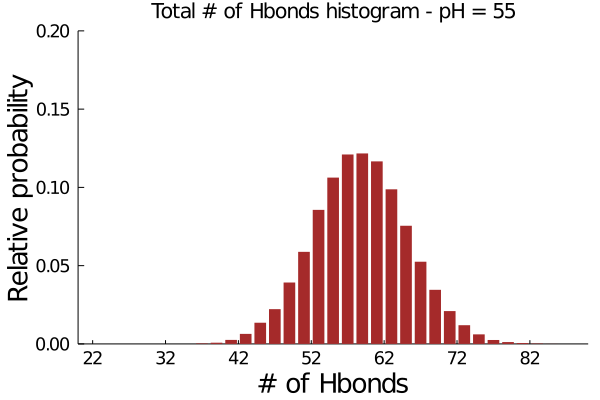

In [176]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_55))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_55, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",55),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

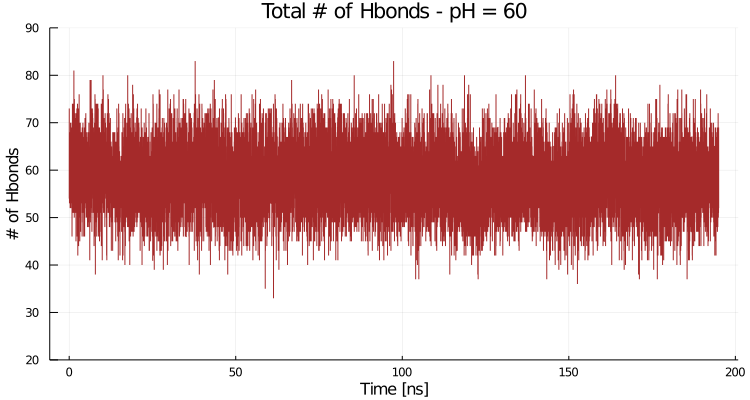

In [177]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_apo_60,
        title = string("Total # of Hbonds - pH = ",60), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

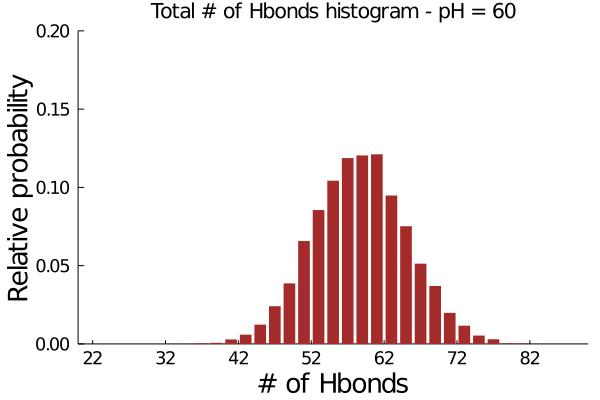

In [178]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_60))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_60, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",60),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

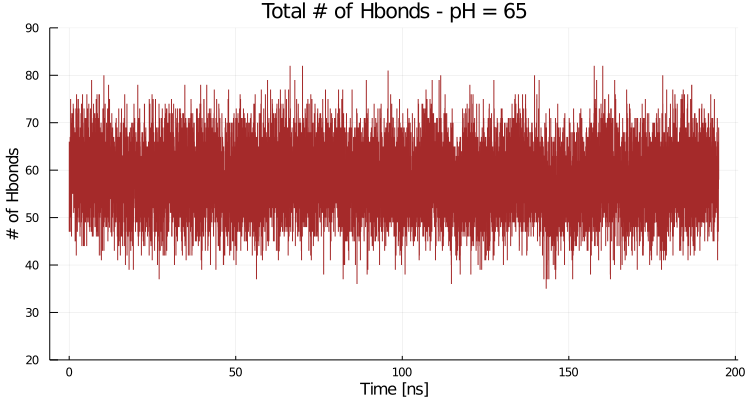

In [179]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_apo_65,
        title = string("Total # of Hbonds - pH = ",65), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

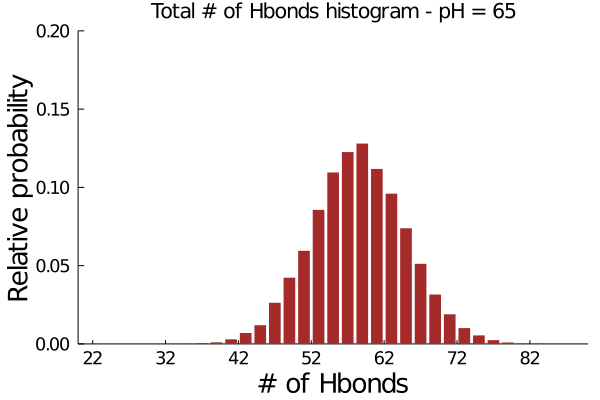

In [180]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_65))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_65, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",65),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

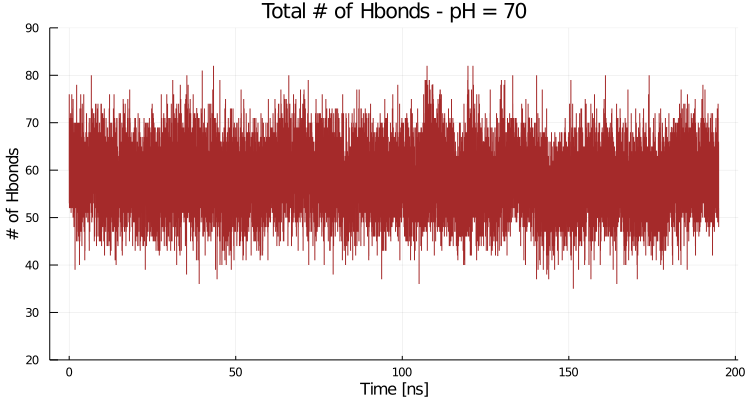

In [181]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_apo_70,
        title = string("Total # of Hbonds - pH = ",70), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

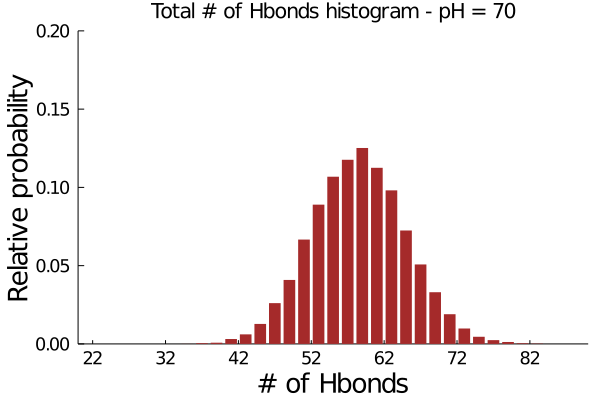

In [182]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_70))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_70, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",70),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

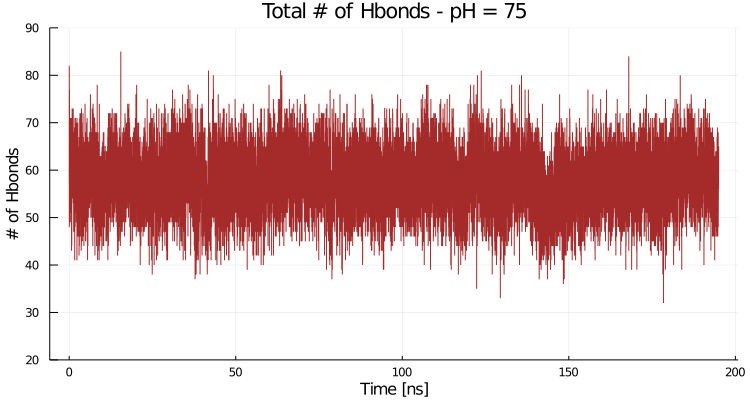

In [183]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_apo_75,
        title = string("Total # of Hbonds - pH = ",75), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

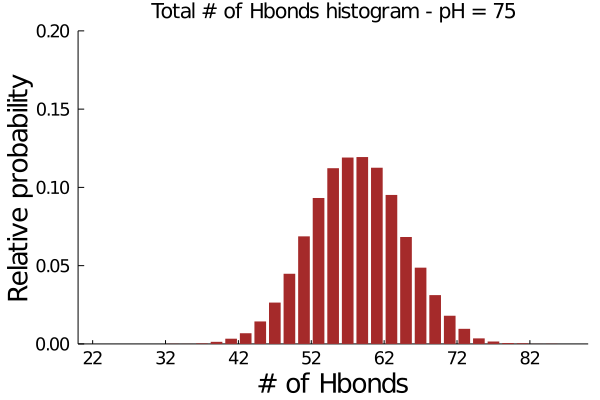

In [184]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_75))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_75, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",75),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

In [185]:
vals = vcat([ mean(nhb_apo_30) std(nhb_apo_30) std(nhb_apo_30) / mean(nhb_apo_30) ],
[ mean(nhb_apo_35) std(nhb_apo_35) std(nhb_apo_35) / mean(nhb_apo_35) ],
[ mean(nhb_apo_40) std(nhb_apo_40) std(nhb_apo_40) / mean(nhb_apo_40) ],
[ mean(nhb_apo_45) std(nhb_apo_45) std(nhb_apo_45) / mean(nhb_apo_45) ],
[ mean(nhb_apo_50) std(nhb_apo_50) std(nhb_apo_50) / mean(nhb_apo_50) ],
[ mean(nhb_apo_55) std(nhb_apo_55) std(nhb_apo_55) / mean(nhb_apo_55) ],
[ mean(nhb_apo_60) std(nhb_apo_60) std(nhb_apo_60) / mean(nhb_apo_60) ],
[ mean(nhb_apo_65) std(nhb_apo_65) std(nhb_apo_65) / mean(nhb_apo_65) ],
[ mean(nhb_apo_70) std(nhb_apo_70) std(nhb_apo_70) / mean(nhb_apo_70) ],
[ mean(nhb_apo_75) std(nhb_apo_75) std(nhb_apo_75) / mean(nhb_apo_75) ])

NamedArray(vals, (string.(phs), ["μ" ; "std" ; "μ/std"]))

10×3 Named Array{Float64,2}
A ╲ B │        μ       std     μ/std
──────┼─────────────────────────────
30    │  53.6252   6.40518  0.119443
35    │  55.5763   6.44623  0.115989
40    │  56.9156   6.48374  0.113918
45    │  57.9563    6.5692  0.113348
50    │  58.2491   6.45878  0.110882
55    │  58.2812   6.45919  0.110828
60    │  58.2047   6.43628   0.11058
65    │  58.0249    6.4029  0.110348
70    │  58.0033   6.41929  0.110671
75    │  57.7117   6.39486  0.110807

## hbonds count por idx

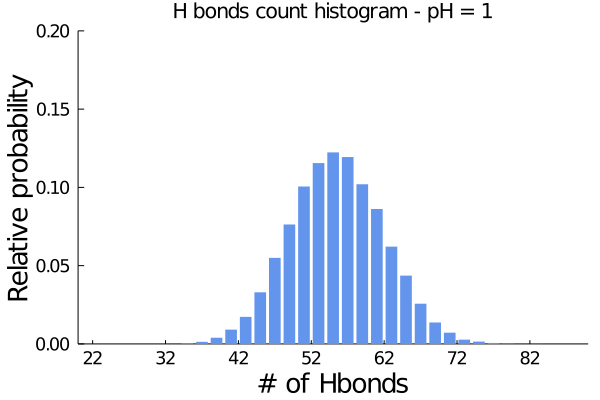

In [186]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_1))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_1, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 1),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

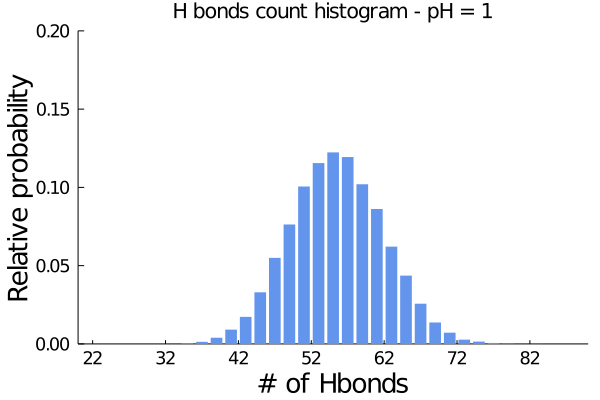

In [187]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_1))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_1, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 1),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

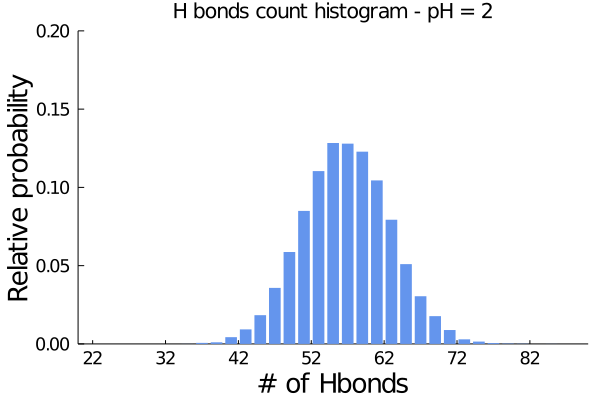

In [188]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_2))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_2, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 2),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

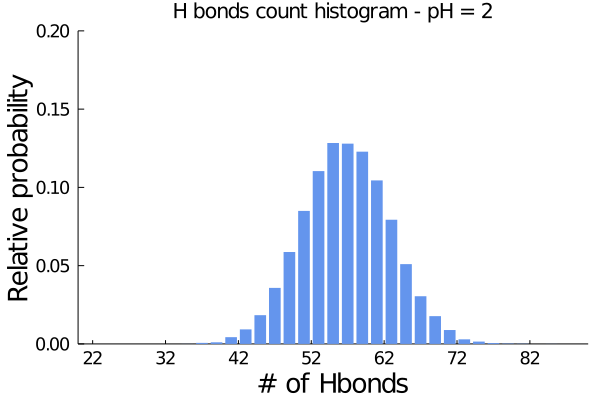

In [189]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_2))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_2, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 2),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

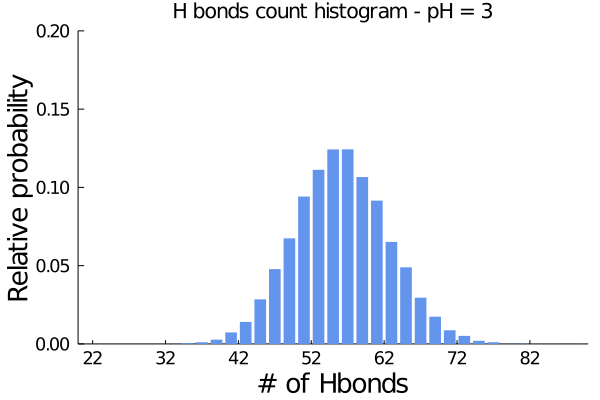

In [190]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_3))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_3, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 3),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

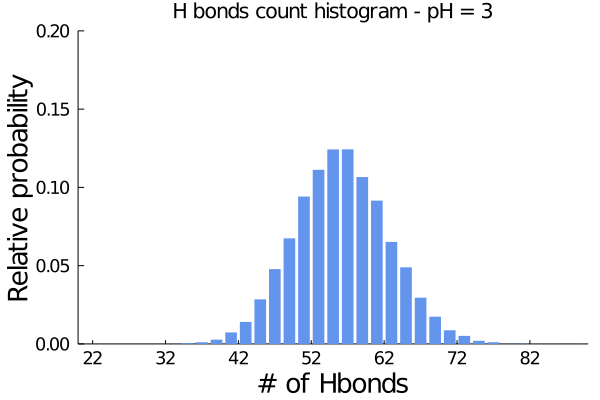

In [191]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_3))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_3, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 3),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

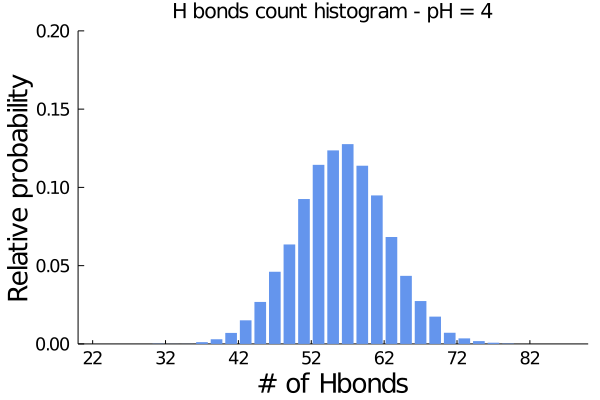

In [192]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_4))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_4, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 4),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

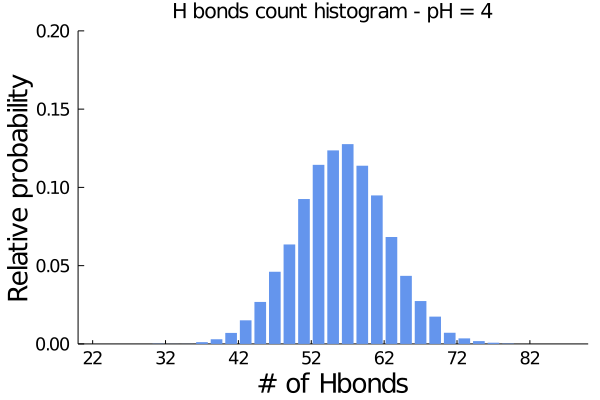

In [193]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_4))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_4, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 4),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

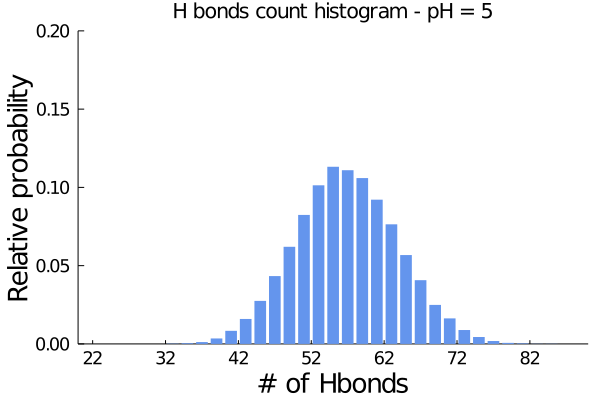

In [194]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_5))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_5, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 5),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

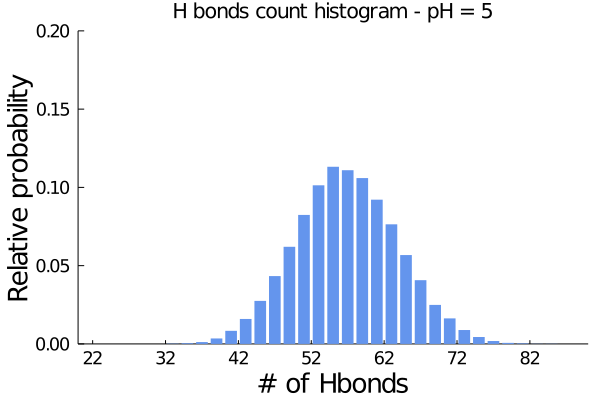

In [195]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_5))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_5, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 5),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

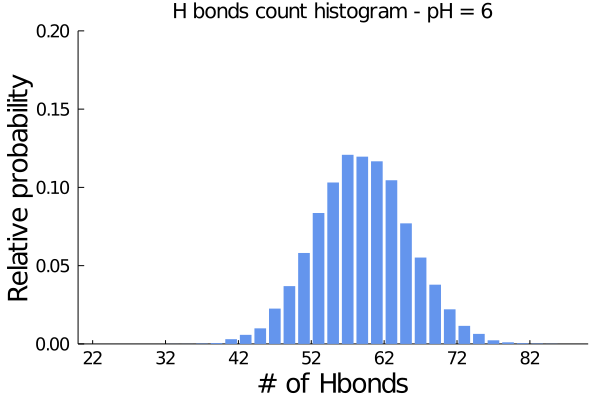

In [196]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_6))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_6, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 6),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

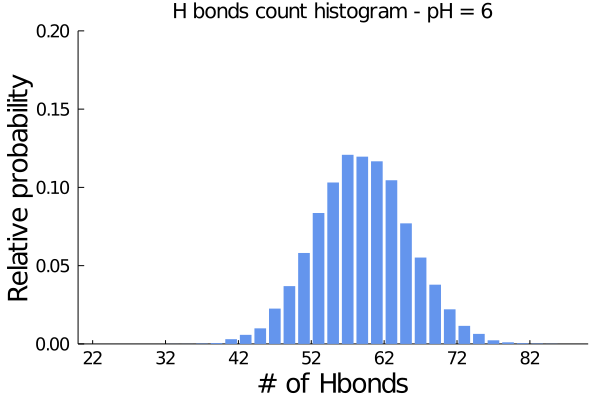

In [197]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_6))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_6, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 6),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

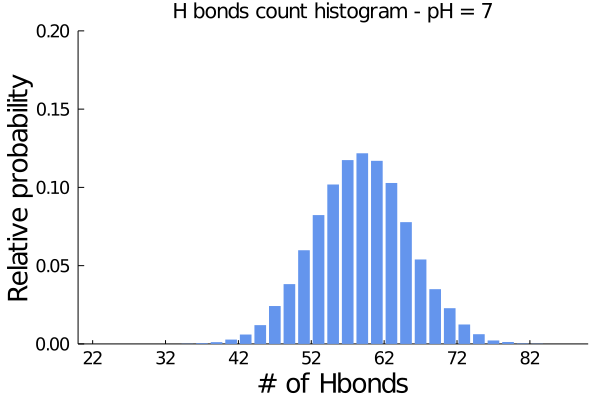

In [198]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_7))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_7, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 7),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

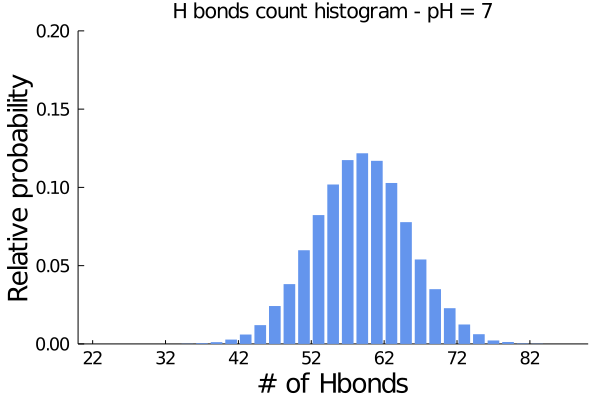

In [199]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_7))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_7, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 7),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

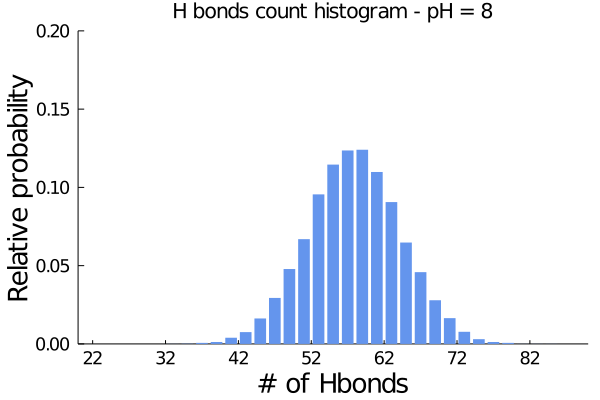

In [200]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_8))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_8, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 8),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

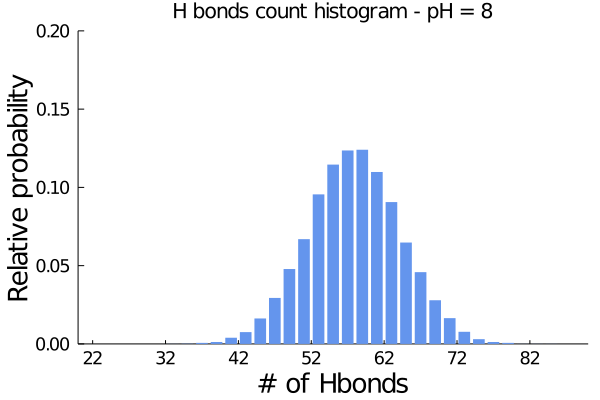

In [201]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_8))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_8, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 8),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

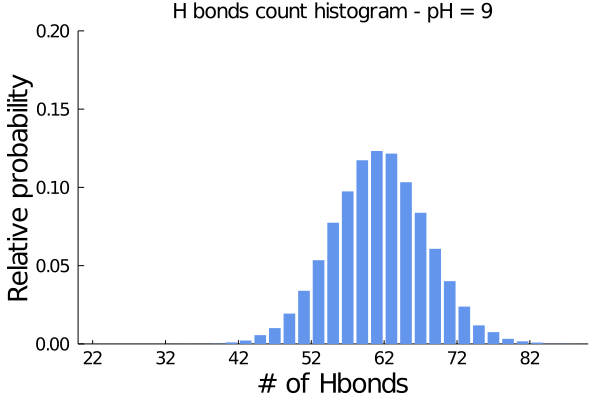

In [202]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_9))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_9, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 9),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

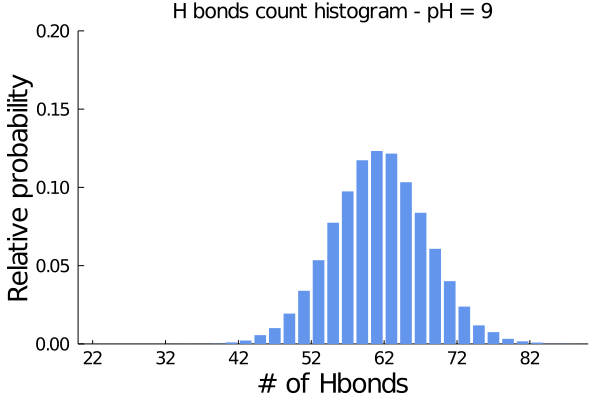

In [203]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_9))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_9, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 9),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

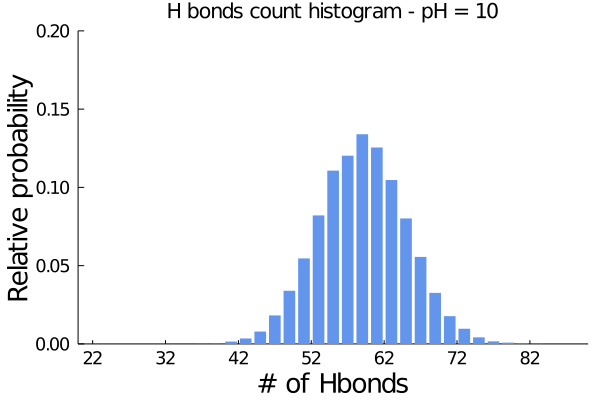

In [204]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_10))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_10, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 10),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

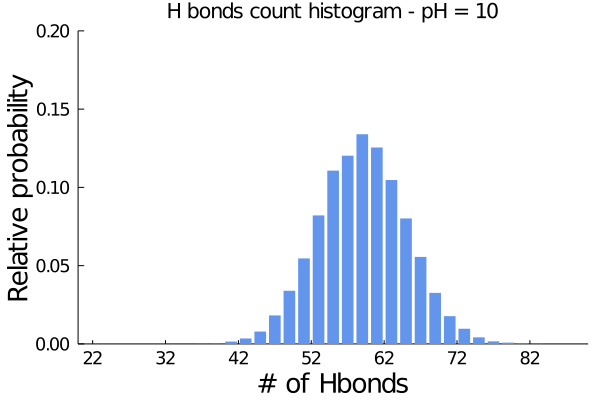

In [205]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_apo_10))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_apo_10, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 10),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

In [206]:
vals = vcat([ mean(nhb_apo_1) std(nhb_apo_1) std(nhb_apo_1) / mean(nhb_apo_1) ],
[ mean(nhb_apo_2) std(nhb_apo_2) std(nhb_apo_2) / mean(nhb_apo_2) ],
[ mean(nhb_apo_3) std(nhb_apo_3) std(nhb_apo_3) / mean(nhb_apo_3) ],
[ mean(nhb_apo_4) std(nhb_apo_4) std(nhb_apo_4) / mean(nhb_apo_4) ],
[ mean(nhb_apo_5) std(nhb_apo_5) std(nhb_apo_5) / mean(nhb_apo_5) ],
[ mean(nhb_apo_6) std(nhb_apo_6) std(nhb_apo_6) / mean(nhb_apo_6) ],
[ mean(nhb_apo_7) std(nhb_apo_7) std(nhb_apo_7) / mean(nhb_apo_7) ],
[ mean(nhb_apo_8) std(nhb_apo_8) std(nhb_apo_8) / mean(nhb_apo_8) ],
[ mean(nhb_apo_9) std(nhb_apo_9) std(nhb_apo_9) / mean(nhb_apo_9) ],
[ mean(nhb_apo_10) std(nhb_apo_10) std(nhb_apo_10) / mean(nhb_apo_10) ])

NamedArray(vals, (string.(idx), ["μ" ; "std" ; "μ/std"]))

10×3 Named Array{Float64,2}
A ╲ B │        μ       std     μ/std
──────┼─────────────────────────────
1     │  55.0166   6.39254  0.116193
2     │  56.2996   5.99086   0.10641
3     │  55.6199    6.4283  0.115576
4     │  55.6052   6.26354  0.112643
5     │  56.3642   6.96445  0.123562
6     │  58.4805   6.43303  0.110003
7     │  58.3745   6.48445  0.111084
8     │  57.4053   6.34985  0.110614
9     │  60.8559   6.45173  0.106017
10    │  58.5267    5.9992  0.102504

## hbonds count por idx

In [207]:
nhb_cnt_apo_acc_phs = Array{Int64, 2}(undef, aa, 0)
nhb_cnt_apo_don_phs = Array{Int64, 2}(undef, aa, 0)

for ph in phs
    nhb_ser_apo_acc_ph = fill(0, (aa, nstlim))
    nhb_ser_apo_don_ph = fill(0, (aa, nstlim))
    
    temporal_acc = readdlm(joinpath(dir_apo_hbo, string(ph, "ph"),
        string("series_nhb_apo_gl4_as4_lys_acc_", ph)), header = true)
    
    temporal_don = readdlm(joinpath(dir_apo_hbo, string(ph, "ph"),
        string("series_nhb_apo_gl4_as4_lys_don_", ph)), header = true)
    
    res_hbo_apo_acc_phs = convert(Array{Bool, 2}, temporal_acc[1][:, 2:end])
    acceptor_donor_acc = convert(Array{String, 1}, temporal_acc[2][2:end])
    
    res_hbo_apo_don_phs = convert(Array{Bool, 2}, temporal_don[1][:, 2:end])
    acceptor_donor_don = convert(Array{String, 1}, temporal_don[2][2:end])
    

    for i = 1:nstlim  
        mascara_acc = findall(res_hbo_apo_acc_phs[i, :])
        mascara_don = findall(res_hbo_apo_don_phs[i, :])
        
        for j in mascara_acc
            acceptor, donor = split(acceptor_donor_acc[j], "-")
            don = parse(Int64, split(split(donor, "_")[2], "@")[1])
            acc = parse(Int64, split(split(acceptor, "_")[2], "@")[1])
            nhb_ser_apo_acc_ph[don, i] += 1
            nhb_ser_apo_acc_ph[acc, i] += 1
        end
        
        for j in mascara_don
            acceptor, donor = split(acceptor_donor_don[j], "-")
            acc = parse(Int64, split(split(acceptor, "_")[2], "@")[1])
            don = parse(Int64, split(split(donor, "_")[2], "@")[1])
            nhb_ser_apo_don_ph[don, i] += 1
            nhb_ser_apo_don_ph[acc, i] += 1
        end
    end

    nhb_cnt_apo_acc_ph = mapslices(x -> sum(x), nhb_ser_apo_acc_ph, dims = 2)[:, 1]
    global nhb_cnt_apo_acc_phs = hcat(nhb_cnt_apo_acc_phs, nhb_cnt_apo_acc_ph)
    
    nhb_cnt_apo_don_ph = mapslices(x -> sum(x), nhb_ser_apo_don_ph, dims = 2)[:, 1]
    global nhb_cnt_apo_don_phs = hcat(nhb_cnt_apo_don_phs, nhb_cnt_apo_don_ph)
    
end

In [208]:
nhb_cnt_apo_phs = nhb_cnt_apo_acc_phs .+ nhb_cnt_apo_don_phs;

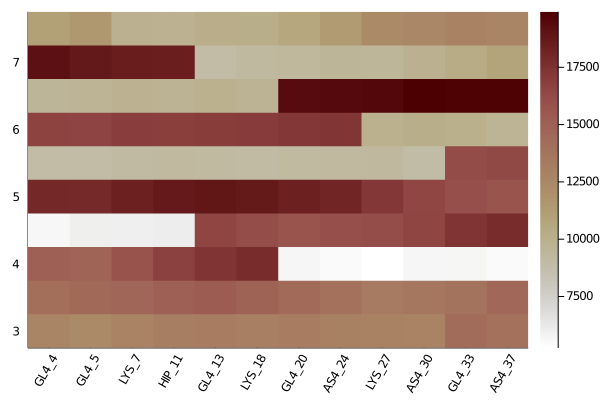

In [209]:
heatmap(titratable_residues[1:12], (phs ./ 10), nhb_cnt_apo_phs[titratable_resis[1:12], :],
    xrotation = 60, color = :bilbao)

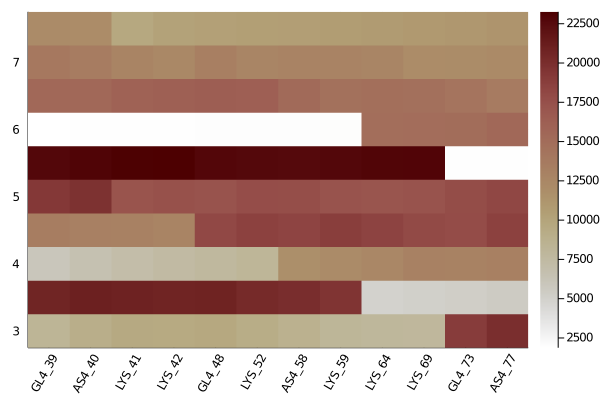

In [210]:
heatmap(titratable_residues[13:24], (phs ./ 10), nhb_cnt_apo_phs[titratable_resis[13:24], :],
    xrotation = 60, color = :bilbao)

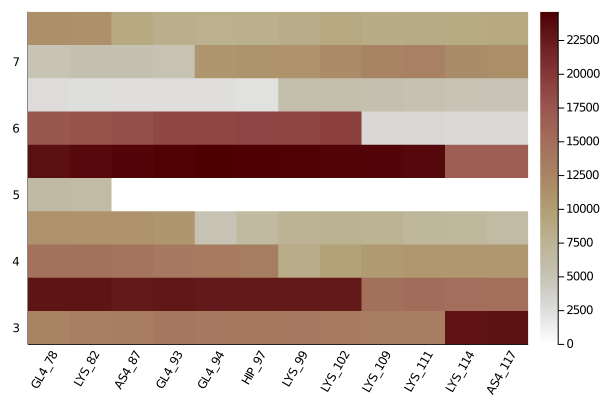

In [211]:
heatmap(titratable_residues[25:end], (phs ./ 10), nhb_cnt_apo_phs[titratable_resis[25:end], :],
    xrotation = 60, color = :bilbao)